# Web Scraping with pandas
### Source page
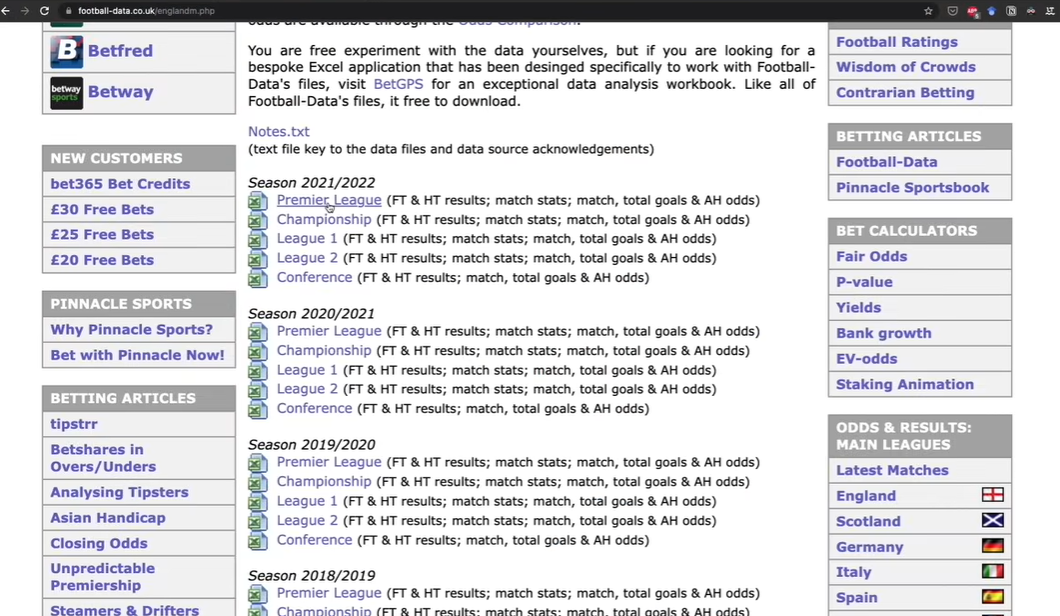

description



### Link structure
Link: root + season + league
* https://www.football-data.co.uk/mmz4281/2122/E0.csv
* https://www.football-data.co.uk/mmz4281/2122/E1.csv



In [ ]:
import pandas as pd

# reading one .csv file - sample
df_premier21 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv')

# link structure
'https://www.football-data.co.uk/mmz4281/' + '2122' + '/' + 'E0' + '.csv'
# create a root variable
root = 'https://www.football-data.co.uk/mmz4281/'

# create a list of leagues
leagues = ['E0', 'E1', 'E2', 'E3', 'EC']
# initialize an empty list to collect intermediate results from the loop
frames = []
# loop through leagues, read multiple .csv, append into a list
for league in leagues:
    df = pd.read_csv(root + '2122' + '/' + league + '.csv', encoding='uniqode_escape')
    frames.append(df)

frames